<a href="https://colab.research.google.com/github/angginadwif/Data-Analyst-Project-Business-Decision-Research/blob/main/Data_Analyst_Project_Business_Decision_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Data dan Inspection
Importlah dataset dari https://storage.googleapis.com/dqlab-dataset/data_retail.csv dan kemudian inspeksilah dataset tersebut dengan

1.mencetak lima data teratas saja,

2.mencetak info dataset.

In [ ]:
import pandas as pd

df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  ...  Average_Transaction_Amount Count_Transaction
0   1        1  ...                     1467681                22
1   2        2  ...                     1269337                41
2   3        3  ...                      310915                30
3   4        4  ...                      722632                27
4   5        5  ...                     1775036                25

[5 rows x 8 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no                          100000 non-null  int64 
 1   Row_Num                     100000 non-null  int64 
 2   Customer_ID                 100000 non-null  int64 
 3   Product                     100000 non-null  object
 4   First_Transaction           100000 non-null  int64 
 5   Last_Transaction            100000 

Data Cleansing

Dua kolom yang menunjukkan terjadinya transaksi tidak bertipe datetime, maka ubahlah kedua kolom tersebut ke tipe data datetime.

In [ ]:
# Kolom First_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# Kolom Last_Transaction
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

Lima data teratas:
   no  Row_Num  ...  Average_Transaction_Amount Count_Transaction
0   1        1  ...                     1467681                22
1   2        2  ...                     1269337                41
2   3        3  ...                      310915                30
3   4        4  ...                      722632                27
4   5        5  ...                     1775036                25

[5 rows x 8 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null 

Churn Customers
Untuk menentukan churn customers sesuai definisi yang telah diberikan, carilah

1. transaksi paling terakhir kapan dilakukan
2. klasifikasikanlah mana customer yang berstatus churn dan mana yang tidak.

In [ ]:
# Pengecekan transaksaksi terakhir dalam dataset
print(max(df['Last_Transaction']))

# Klasifikasikan customer yang berstatus churn atau tidak
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False

print('Lima data teratas:')
print(df.head())

print('\nInfo dataset:')
print(df.info())

2019-02-01 23:57:57.286000013
Lima data teratas:
   no  Row_Num  ...  Count_Transaction is_churn
0   1        1  ...                 22    False
1   2        2  ...                 41    False
2   3        3  ...                 30    False
3   4        4  ...                 27    False
4   5        5  ...                 25    False

[5 rows x 9 columns]

Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[n

Menghapus kolom yang tidak diperlukan

In [ ]:
del df['no']
del df['Row_Num']

# Cetak lima data teratas
print(df.head())

   Customer_ID Product  ... Count_Transaction is_churn
0        29531   Jaket  ...                22    False
1        29531  Sepatu  ...                41    False
2       141526     Tas  ...                30    False
3       141526   Jaket  ...                27    False
4        37545  Sepatu  ...                25    False

[5 rows x 7 columns]


Customer acquisition by year

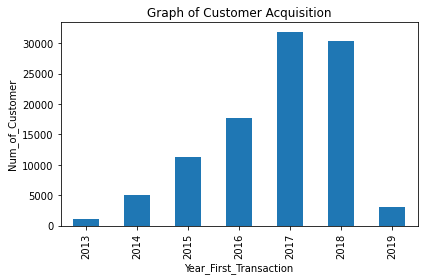

In [ ]:
import matplotlib.pyplot as plt

# Kolom tahun transaksi pertama
df['Year_First_Transaction'] = df['First_Transaction'].dt.year

# Kolom tahun transaksi terakhir
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

Transaction by year


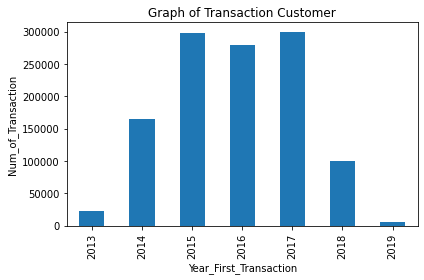

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

Average transaction amount by year

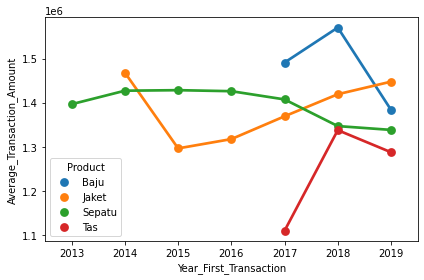

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
sns.pointplot(data = df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
			  x='Year_First_Transaction',
			  y='Average_Transaction_Amount',
			  hue='Product')
plt.tight_layout()
plt.show()